In [1]:
import scanpy as sc

In [2]:
combined_adata = sc.read_h5ad("../Data/combined_scVI.h5ad")

In [3]:
combined_adata

AnnData object with n_obs × n_vars = 411394 × 13817
    obs: 'sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'batch', 'batch_origin', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'neighbors', 'umap'
    obsm: 'X_normalized_scVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    obsp: 'connectivities', 'distances'

In [4]:
small_marker_dict = {
    # 非免疫细胞（用于排除）
    'Cardiomyocyte': ['Tnnt2', 'Actc1', 'Myh6', 'Myh7'],
    'Fibroblast': ['Col1a1', 'Col1a2', 'Ddr2', 'Pdgfra'],
    'Endothelial': ['Pecam1', 'Cdh5', 'Vwf', 'Icam2'],
    'Pericyte': ['Rgs5', 'Cspg4', 'Pdgfrb'],

    # 免疫细胞
    'IMM Sp':['Ptprc'],
    'T cell': ['Cd3d', 'Cd3e', 'Cd3g', 'Cd4', 'Cd8a'],
    'B cell': ['Cd19', 'Cd79a', 'Ms4a1', 'Cd79b'],
    'Plasma cell': ['Ighg', 'Jchain', 'Sdc1', 'Xbp1'],
    'NK cell': ['Ncr1', 'Klrb1c', 'Klrc1', 'Gzmb'],
    'Monocyte': ['Cd14', 'Ly6c1', 'Ly6c2', 'Ccr2'],
    'Macrophage': ['Adgre1', 'Cd68', 'Csf1r', 'Mertk'],
    'Neutrophil': ['Ly6g', 'S100a8', 'S100a9', 'Cxcr2'],
    'Dendritic cell': ['Itgax', 'Cd11c', 'H2-Ab1', 'Cd209a'],
    'Mast cell': ['Cma1', 'Mcpt4', 'Kit', 'Fcer1a'],
    'Eosinophil': ['Siglecf', 'Epx', 'Prg2', 'Il5ra'],
    'Basophil': ['Mcpt8', 'Cd200r3', 'Il3ra', 'Ccr3'],

}
smarker_genes_in_data = dict()
for ct, markers in small_marker_dict.items():
    markers_found = list()
    for marker in markers:
        if marker in combined_adata.var.index:
            markers_found.append(marker)
    smarker_genes_in_data[ct] = markers_found
#del [] # remove the last marker
del_markers = list()
for ct, markers in smarker_genes_in_data.items():
    if markers==[]:
        del_markers.append(ct)
for ct in del_markers:
    del smarker_genes_in_data[ct]

In [5]:
sc.tl.dendrogram(combined_adata, groupby='leiden',use_rep= 'X_scVI')

categories: 0, 1, 2, etc.
var_group_labels: Cardiomyocyte, Fibroblast, Endothelial, etc.


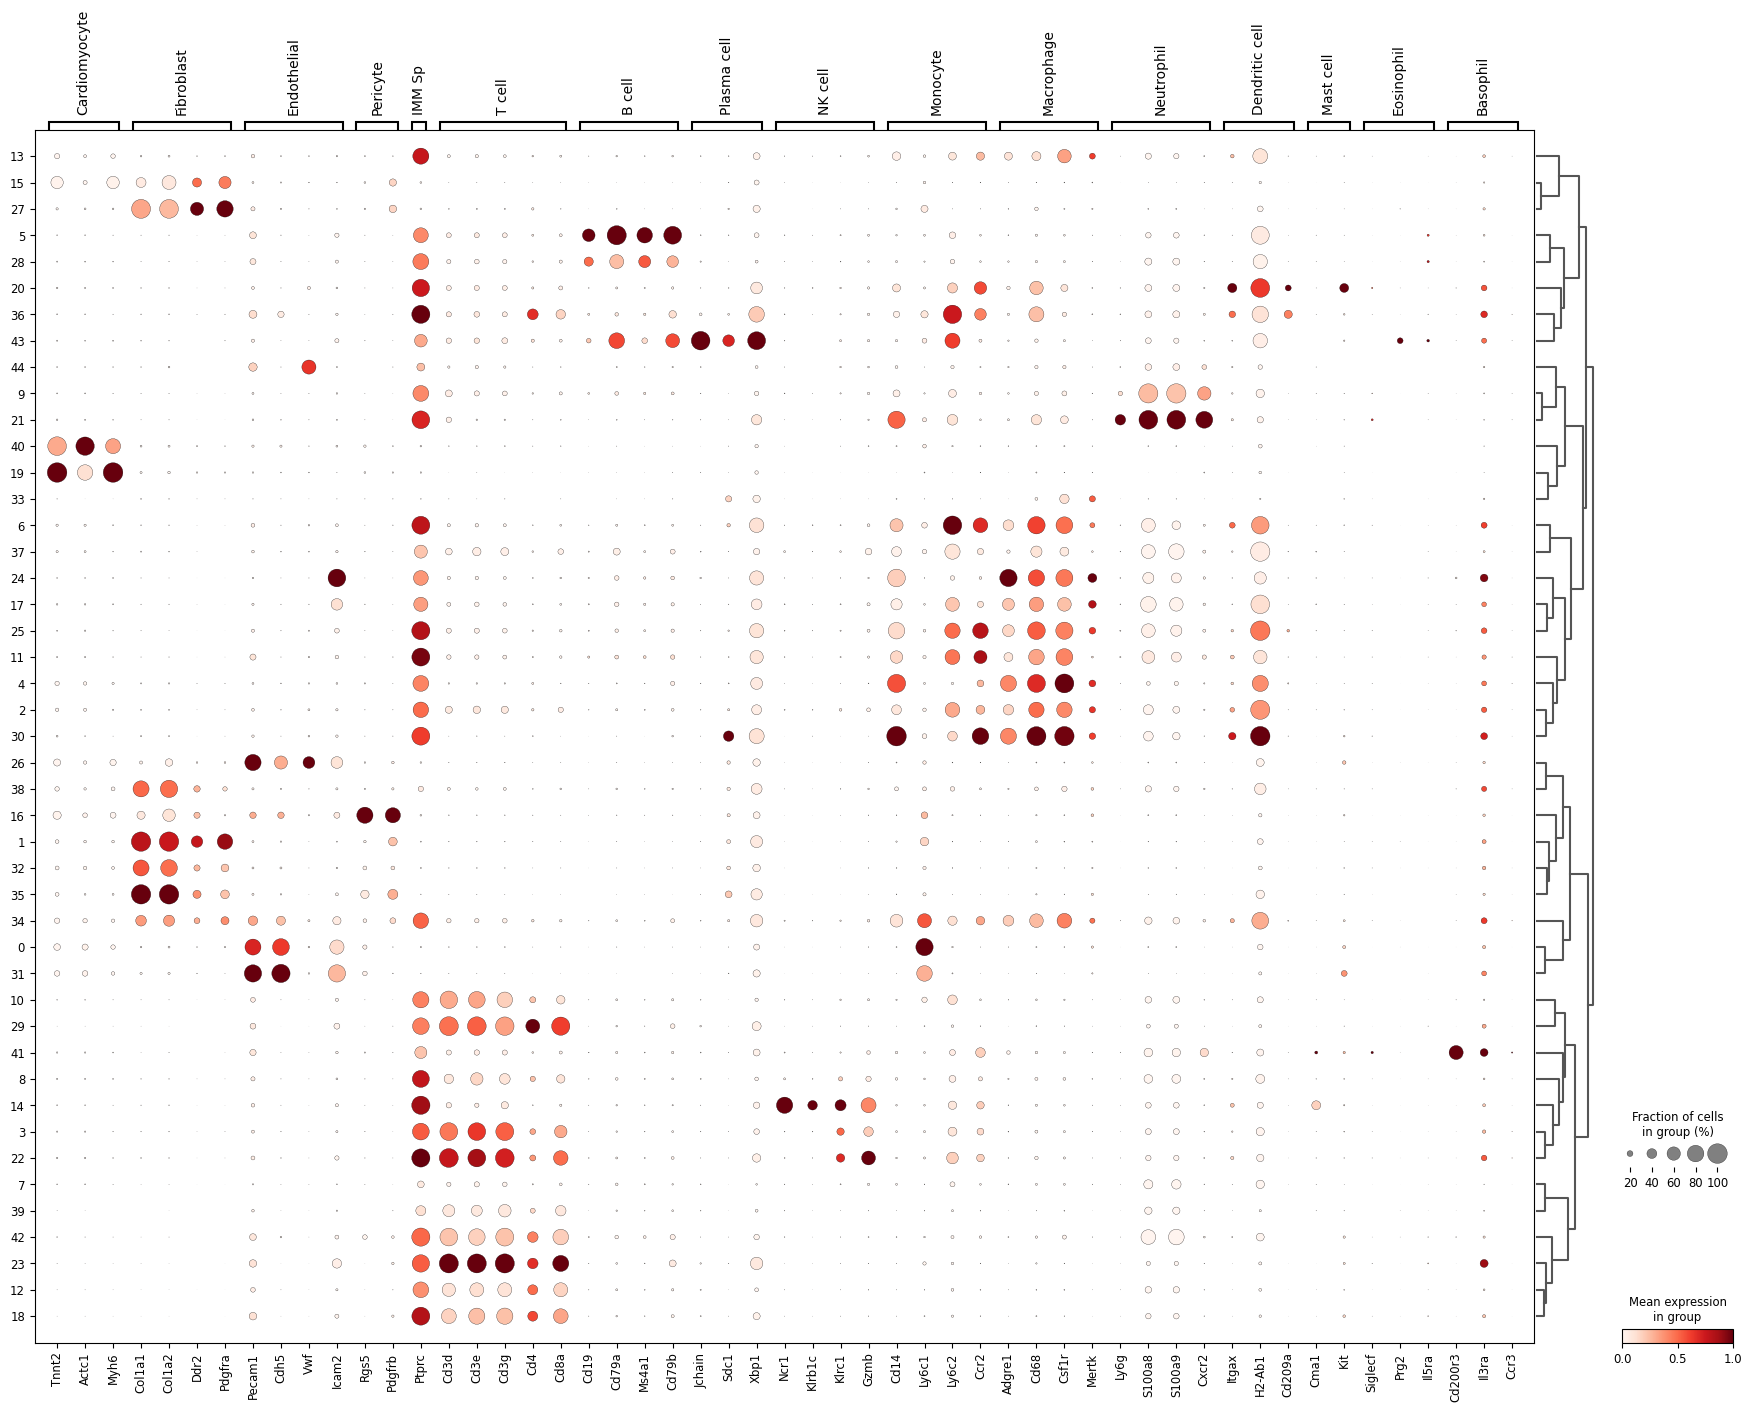

In [6]:
sc.pl.dotplot(
    combined_adata,
    groupby="leiden",
    var_names=smarker_genes_in_data,
    dendrogram=True,
    standard_scale="var",
    save  = "Anno_IMMFirst_plot.pdf"
)

In [12]:
annotation_IMM = {
    'NonImm': ['15', '27', '40', '19', '26', '38', '16', '1', '32', '35', '34', '0', '31'],
    'Imm': ['13', '5', '28', '20', '36','43', '44', '9', '21', '33', '6','37', '24', '17', '25', '11', '4', '2', '30', '10','29', '41', '8', '14', '3', '22', '7', '39', '42', '23', '12', '18']
}
cluster_annotation_IMM = {}
for celltype, clusters in annotation_IMM.items():
    for cluster in clusters:
        cluster_annotation_IMM[cluster] = celltype
Imm_adata = combined_adata# 应用映射
Imm_adata.obs['IMM_Celltype'] = Imm_adata.obs['leiden'].map(cluster_annotation_IMM).astype('category')

In [13]:
Imm_adata.obs['IMM_Celltype']

JB-1-Myocaritids-Mus_AAACCTGAGCAATATG-1                            Imm
JB-1-Myocaritids-Mus_AAACCTGTCAGTCAGT-1                            Imm
JB-1-Myocaritids-Mus_AAACCTGTCGTATCAG-1                            Imm
JB-1-Myocaritids-Mus_AAACCTGTCTGATTCT-1                            Imm
JB-1-Myocaritids-Mus_AAAGATGAGCGATATA-1                            Imm
                                                                 ...  
13_20211013_Mu_Heart_TCRM2_14D102_nuc_GEM.TTTGGTTCATGAAGCG-1    NonImm
13_20211013_Mu_Heart_TCRM2_14D102_nuc_GEM.TTTGGTTTCCGTGTGG-1    NonImm
13_20211013_Mu_Heart_TCRM2_14D102_nuc_GEM.TTTGTTGGTGTATCCA-1    NonImm
13_20211013_Mu_Heart_TCRM2_14D102_nuc_GEM.TTTGTTGGTTCTTGCC-1    NonImm
13_20211013_Mu_Heart_TCRM2_14D102_nuc_GEM.TTTGTTGTCTACGGGC-1    NonImm
Name: IMM_Celltype, Length: 411394, dtype: category
Categories (2, object): ['Imm', 'NonImm']

In [14]:
imm_adata = combined_adata[combined_adata.obs['IMM_Celltype'] == 'Imm'].copy()

In [15]:
sc.pp.neighbors(imm_adata, use_rep="X_scVI")
sc.tl.leiden(imm_adata)
sc.tl.umap(imm_adata)
output_path = "../Data/ImmAdata.h5ad"
imm_adata.write_h5ad(output_path)

C:\Users\yuanf\AppData\Local\Temp\ipykernel_23512\3874473930.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(imm_adata)


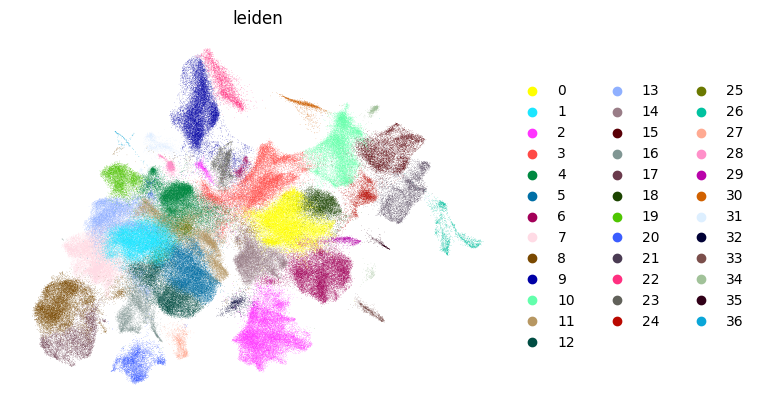

In [18]:
sc.settings.figdir = "../Figures"
sc.pl.umap(imm_adata,
           color="leiden",
           frameon=False,
           ncols=1,
           save = "UMAP-imm-leiden.pdf",
           show = True,
           )